In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

---

### 1. 데이터 불러오기

In [2]:
data =  pd.read_csv('data/한국교통안전공단_자동차결함 리콜현황_20201231.csv', encoding='euc-kr')

In [3]:
data.head()

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품..."
3,한국토요타자동차(주),토요타 캠리,2019-08-23,2019-09-06,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."
4,한국토요타자동차(주),토요타 캠리 하이브리드,2019-08-21,2019-09-04,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   제작자       1275 non-null   object
 1   차명        1275 non-null   object
 2   생산기간(부터)  1275 non-null   object
 3   생산기간(까지)  1275 non-null   object
 4   리콜개시일     1275 non-null   object
 5   리콜사유      1275 non-null   object
dtypes: object(6)
memory usage: 59.9+ KB


---

### 2. 데이터 정제

#### 2-1. 결측값 확인

In [5]:
import matplotlib.font_manager as fm

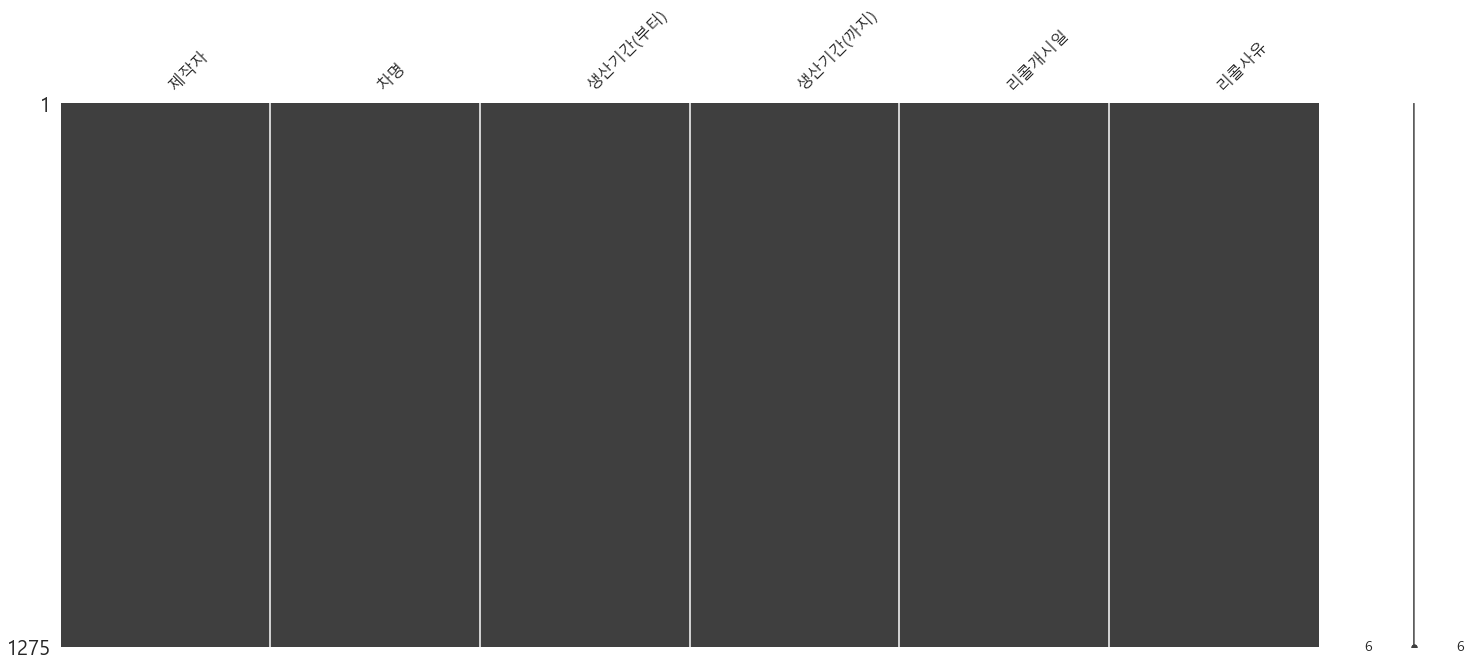

In [6]:
plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', 
        rc={"axes.unicode_minus":False}
       )
msno.matrix(data)
plt.show()

In [7]:
data.isnull().sum()

제작자         0
차명          0
생산기간(부터)    0
생산기간(까지)    0
리콜개시일       0
리콜사유        0
dtype: int64

In [8]:
data.isna().sum()

제작자         0
차명          0
생산기간(부터)    0
생산기간(까지)    0
리콜개시일       0
리콜사유        0
dtype: int64

#### 2-2. 중복값 확인하기

In [9]:
data[data.duplicated(keep=False)]  # keep=False 중복 되어 있는 모든 값 출력

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
34,비엠더블유코리아(주),BMW 316i,2001-01-09,2001-01-09,2020-02-07,차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 ...
82,비엠더블유코리아(주),BMW 316i,2001-01-09,2001-01-09,2020-02-07,차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 ...


In [10]:
print('Before:', len(data))
data = data.drop_duplicates()
print('After:', len(data))

Before: 1275
After: 1274


#### 2.3 기초적인 데이터 변형

In [11]:
df = data.copy()
df.head()

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품..."
3,한국토요타자동차(주),토요타 캠리,2019-08-23,2019-09-06,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."
4,한국토요타자동차(주),토요타 캠리 하이브리드,2019-08-21,2019-09-04,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."


In [12]:
def get_year(date):
    year = int(date[:4])
    return year

def get_month(date):
    month = int(date[5:7])
    return month

def get_day(date):
    day = int(date[8:])
    return day


df['start_year'] = df['생산기간(부터)'].apply(get_year)
df['start_month'] = df['생산기간(부터)'].apply(get_month)
df['start_day'] = df['생산기간(부터)'].apply(get_day)

df['end_year'] = df['생산기간(까지)'].apply(get_year)
df['end_month'] = df['생산기간(부터)'].apply(get_month)
df['end-day'] = df['생산기간(부터)'].apply(get_day)

df['recall_year'] = df['리콜개시일'].apply(get_year)
df['recall_month'] = df['리콜개시일'].apply(get_month)
df['recall_day'] = df['리콜개시일'].apply(get_day)

In [13]:
df

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,start_year,start_month,start_day,end_year,end_month,end-day,recall_year,recall_month,recall_day
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,28,2016,5,28,2020,3,23
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,8,2016,5,8,2020,3,23
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품...",2019,7,11,2019,7,11,2020,1,23
3,한국토요타자동차(주),토요타 캠리,2019-08-23,2019-09-06,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...",2019,8,23,2019,8,23,2020,1,23
4,한국토요타자동차(주),토요타 캠리 하이브리드,2019-08-21,2019-09-04,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...",2019,8,21,2019,8,21,2020,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,한국닛산(주),INFINITI M30,2012-02-06,2012-02-06,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2012,2,6,2012,2,6,2020,12,28
1271,한국닛산(주),INFINITI M30d,2012-07-18,2013-06-28,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2012,7,18,2013,7,18,2020,12,28
1272,한국닛산(주),INFINITI Q70 3.0d,2013-09-18,2015-06-23,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2013,9,18,2015,9,18,2020,12,28
1273,한국닛산(주),INFINITI M56,2010-05-25,2011-11-23,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2010,5,25,2011,5,25,2020,12,28


In [14]:
df = df.drop(columns=['생산기간(부터)', '생산기간(까지)', '리콜개시일'])
df

,제작자,차명,리콜사유,start_year,start_month,start_day,end_year,end_month,end-day,recall_year,recall_month,recall_day
0,(주)에프엠케이,기블리 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,28,2016,5,28,2020,3,23
1,(주)에프엠케이,콰트로포르테 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,8,2016,5,8,2020,3,23
2,한국토요타자동차(주),토요타 프리우스,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품...",2019,7,11,2019,7,11,2020,1,23
3,한국토요타자동차(주),토요타 캠리,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...",2019,8,23,2019,8,23,2020,1,23
4,한국토요타자동차(주),토요타 캠리 하이브리드,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...",2019,8,21,2019,8,21,2020,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...
1270,한국닛산(주),INFINITI M30,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2012,2,6,2012,2,6,2020,12,28
1271,한국닛산(주),INFINITI M30d,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2012,7,18,2013,7,18,2020,12,28
1272,한국닛산(주),INFINITI Q70 3.0d,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2013,9,18,2015,9,18,2020,12,28
1273,한국닛산(주),INFINITI M56,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2010,5,25,2011,5,25,2020,12,28


In [15]:
df = df.rename(columns = {'제작자' : 'manufacturer', '차명' : 'model', '리콜사유' : 'cause'})
df.head(3)

,manufacturer,model,cause,start_year,start_month,start_day,end_year,end_month,end-day,recall_year,recall_month,recall_day
0,(주)에프엠케이,기블리 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,28,2016,5,28,2020,3,23
1,(주)에프엠케이,콰트로포르테 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,8,2016,5,8,2020,3,23
2,한국토요타자동차(주),토요타 프리우스,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품...",2019,7,11,2019,7,11,2020,1,23


#### 2020년의 리콜 데이터만 대상으로 함 (그 외의 데이터 제외)

In [16]:
df['recall_year'].min(), df['recall_year'].max()

(2019, 2020)

In [17]:
df_2020 = df[df['recall_year'] == 2020]
df_2020

,manufacturer,model,cause,start_year,start_month,start_day,end_year,end_month,end-day,recall_year,recall_month,recall_day
0,(주)에프엠케이,기블리 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,28,2016,5,28,2020,3,23
1,(주)에프엠케이,콰트로포르테 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,8,2016,5,8,2020,3,23
2,한국토요타자동차(주),토요타 프리우스,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품...",2019,7,11,2019,7,11,2020,1,23
3,한국토요타자동차(주),토요타 캠리,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...",2019,8,23,2019,8,23,2020,1,23
4,한국토요타자동차(주),토요타 캠리 하이브리드,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...",2019,8,21,2019,8,21,2020,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...
1270,한국닛산(주),INFINITI M30,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2012,2,6,2012,2,6,2020,12,28
1271,한국닛산(주),INFINITI M30d,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2012,7,18,2013,7,18,2020,12,28
1272,한국닛산(주),INFINITI Q70 3.0d,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2013,9,18,2015,9,18,2020,12,28
1273,한국닛산(주),INFINITI M56,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2010,5,25,2011,5,25,2020,12,28


---

### 3. 데이터 시각화

In [18]:
df_2020.groupby('manufacturer').count()['model'].sort_values(ascending=False)

manufacturer
비엠더블유코리아(주)           526
메르세데스벤츠코리아(주)         234
아우디폭스바겐코리아(주)         115
한불모터스(주)               71
한국토요타자동차(주)            54
(주)볼보자동차코리아            39
현대자동차(주)               28
기아자동차(주)               19
(주) 한국모터트레이딩           16
한국지엠주식회사               15
화창상사(주)                14
포드세일즈서비스코리아(유)         14
다임러트럭코리아(주)            13
(주) 바이크코리아             12
만트럭버스코리아(주)            11
혼다코리아(주)               10
(주)에프엠케이                9
한국닛산(주)                 7
에프씨에이코리아(주)             7
(주)재규어랜드로버코리아           7
르노삼성자동차(주)              6
대전기계공업(주)               6
포르쉐코리아 주식회사             5
(주)스포츠모터사이클코리아          4
유한회사 모토로싸               4
기흥인터내셔널 유한회사            4
쌍용자동차(주)                3
허스크바나모터싸이클코리아 주식회사      3
(주)에이비케이                2
스카니아코리아그룹(주)            1
(주)스즈키씨엠씨               1
지엠아시아퍼시픽지역본부 주식회사       1
아이씨피(주)                 1
(주) 다빈월드                1
Name: model, dtype: int64

In [19]:
tmp_manufacturer = pd.DataFrame(df.groupby('manufacturer').count()['model'].sort_values(ascending=False)).rename(columns={'model' : 'count'})
tmp_manufacturer

,count
manufacturer,
비엠더블유코리아(주),526
메르세데스벤츠코리아(주),234
아우디폭스바겐코리아(주),115
한불모터스(주),71
한국토요타자동차(주),54
(주)볼보자동차코리아,39
현대자동차(주),28
화창상사(주),25
기아자동차(주),19


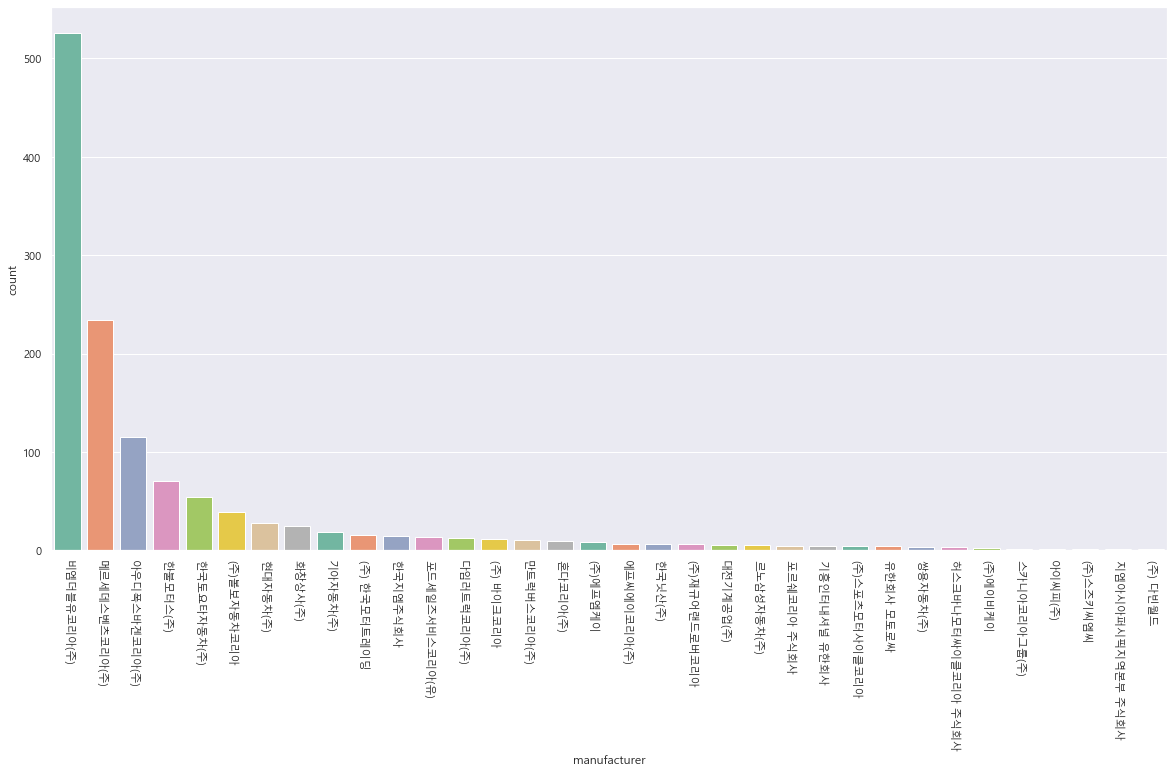

In [20]:
plt.figure(figsize=(20,10))
# 한글 출력을 위해서 폰트 옵션을 설정합니다.
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="manufacturer", data=df, palette="Set2", order=tmp_manufacturer.index)
plt.xticks(rotation=270)
plt.show()

#### 3.2 모델별 리콜 현황 출력

In [21]:
recall_cnt = df.groupby('model').count()['start_year'].sort_values(ascending=False)
recall_cnt

model
BMW 320d                 15
BMW 520d                 15
BMW X3 xDrive20d         11
BMW 520d xDrive          10
BMW 320d Gran Turismo     9
                         ..
MTN320                    1
MTS1260                   1
MWS125                    1
MXT850                    1
2013-2015년식 Fusion        1
Name: start_year, Length: 639, dtype: int64

In [22]:
pd.DataFrame(df_2020.groupby('model').count()['manufacturer'].sort_values(ascending=False)).rename(columns={'manufacturer':'count'})

,count
model,
BMW 320d,15
BMW 520d,15
BMW X3 xDrive20d,11
BMW 520d xDrive,10
BMW 320d Gran Turismo,9
...,...
Maybach S 560,1
Mercedes-AMG G 63,1
Ninja H2 SX,1


In [23]:
temp = pd.DataFrame(df_2020.groupby('model').count()['manufacturer'].sort_values(ascending=False)).rename(columns={'manufacturer':'count'}).iloc[:50]
temp 

,count
model,
BMW 320d,15
BMW 520d,15
BMW X3 xDrive20d,11
BMW 520d xDrive,10
BMW 320d Gran Turismo,9
BMW X6 xDrive30d,9
MINI Cooper D,8
BMW X5 xDrive30d,8
BMW 320d xDrive Gran Turismo,8


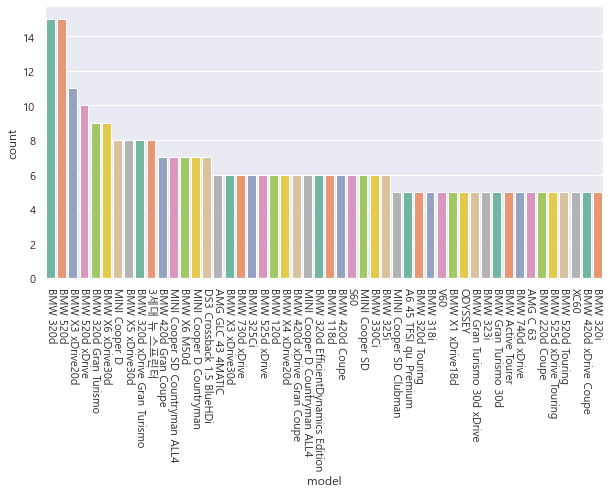

In [26]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='model', data=df[df['model'].isin(temp.index)], palette='Set2', order=temp.index)
plt.xticks(rotation=270)
plt.show()

#### 3.3 월 별 리콜 현황

In [27]:
df.groupby('recall_month').count()['model'].sort_values(ascending=False)

recall_month
8     221
10    161
6     155
12    127
4     114
3     108
2     107
9      72
7      68
5      68
11     46
1      27
Name: model, dtype: int64

In [28]:
temp = pd.DataFrame(df.groupby('recall_month').count()['model'].sort_values(ascending=False)).rename(columns={'model':'count'})
temp = temp.reset_index()
temp

,recall_month,count
0,8,221
1,10,161
2,6,155
3,12,127
4,4,114
5,3,108
6,2,107
7,9,72
8,7,68
9,5,68


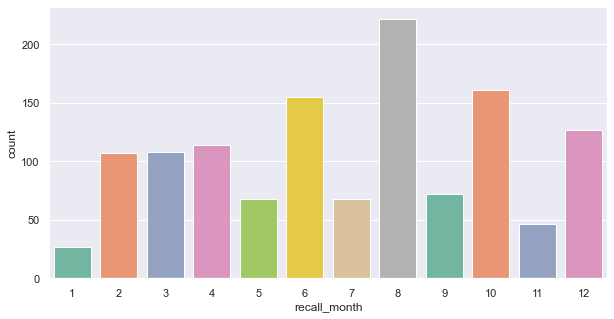

In [29]:
plt.figure(figsize=(10,5))

sns.set(style='darkgrid')
ax = sns.countplot(data=df, x='recall_month', palette='Set2')
plt.show()

#### 3.4 생산연도별 리콜 현황 출력

In [30]:
df.groupby('start_year').count()['model'].sort_values(ascending=False)

start_year
2018    181
2019    175
2020    146
2017    125
2015    102
2013    102
2014     98
2012     92
2016     61
2011     39
2001     21
2010     18
2000     16
2002     14
2003     13
2009     12
2005     10
1999     10
2004      9
2008      9
2006      8
1998      8
2007      5
Name: model, dtype: int64

In [31]:
temp = pd.DataFrame(df.groupby('start_year').count()['model'].sort_values(ascending=False)).rename(columns={'model' : 'count'}).reset_index()
temp

,start_year,count
0,2018,181
1,2019,175
2,2020,146
3,2017,125
4,2015,102
5,2013,102
6,2014,98
7,2012,92
8,2016,61
9,2011,39


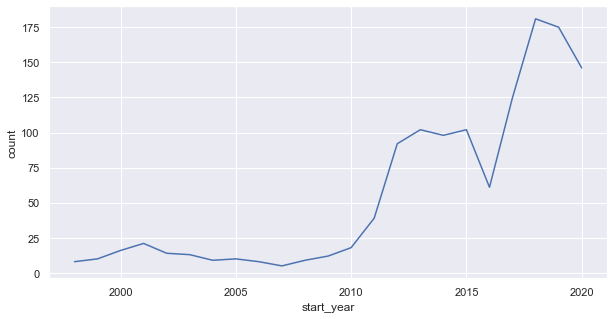

In [32]:
# 그래프의 사이즈를 조절합니다.
plt.figure(figsize=(10,5))

# seaborn의 countplot 함수를 사용하여 출력합니다.
sns.set(style="darkgrid")
sns.lineplot(data=temp, x="start_year", y="count")
plt.show()

##### 퀴즈 1. 2020년에 리콜 개시가 가장 많이 일어난 달(month)과 가장 적게 일어난 달의 차이(건수)를 구하세요.

In [33]:
temp = pd.DataFrame(df.groupby('recall_month').count()['model'].sort_values(ascending=False)).rename(columns={'model' : 'count'})
temp

,count
recall_month,
8,221
10,161
6,155
12,127
4,114
3,108
2,107
9,72
7,68


In [34]:
temp.iloc[0]['count'] - temp.iloc[-1]['count']

194

In [35]:
df.groupby('recall_month').count()['model'].max() - df.groupby('recall_month').count()['model'].min()

194

#### 3.5  2020년 4분기 (10월, 11월, 12월) 제조사별 리콜 현황 시각화

In [36]:
df[df['recall_month'].isin([10,11,12])]

,manufacturer,model,cause,start_year,start_month,start_day,end_year,end_month,end-day,recall_year,recall_month,recall_day
124,화창상사(주),CHIEF CLASSIC,전기장치(기어 스위치) 접점의 산화로 인하여 저항 값이 변경되어 부정확한 기어단수(...,2013,11,7,2018,11,7,2019,12,31
125,화창상사(주),CHIEF DARK HORSE,전기장치(기어 스위치) 접점의 산화로 인하여 저항 값이 변경되어 부정확한 기어단수(...,2015,3,31,2019,3,31,2019,12,31
126,화창상사(주),CHEIF VINTAGE,전기장치(기어 스위치) 접점의 산화로 인하여 저항 값이 변경되어 부정확한 기어단수(...,2013,11,27,2019,11,27,2019,12,31
127,화창상사(주),CHIEFTAIN,전기장치(기어 스위치) 접점의 산화로 인하여 저항 값이 변경되어 부정확한 기어단수(...,2013,11,22,2019,11,22,2019,12,31
128,화창상사(주),CHIEFTAIN DARK HORSE,전기장치(기어 스위치) 접점의 산화로 인하여 저항 값이 변경되어 부정확한 기어단수(...,2016,8,17,2019,8,17,2019,12,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1270,한국닛산(주),INFINITI M30,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2012,2,6,2012,2,6,2020,12,28
1271,한국닛산(주),INFINITI M30d,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2012,7,18,2013,7,18,2020,12,28
1272,한국닛산(주),INFINITI Q70 3.0d,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2013,9,18,2015,9,18,2020,12,28
1273,한국닛산(주),INFINITI M56,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2010,5,25,2011,5,25,2020,12,28


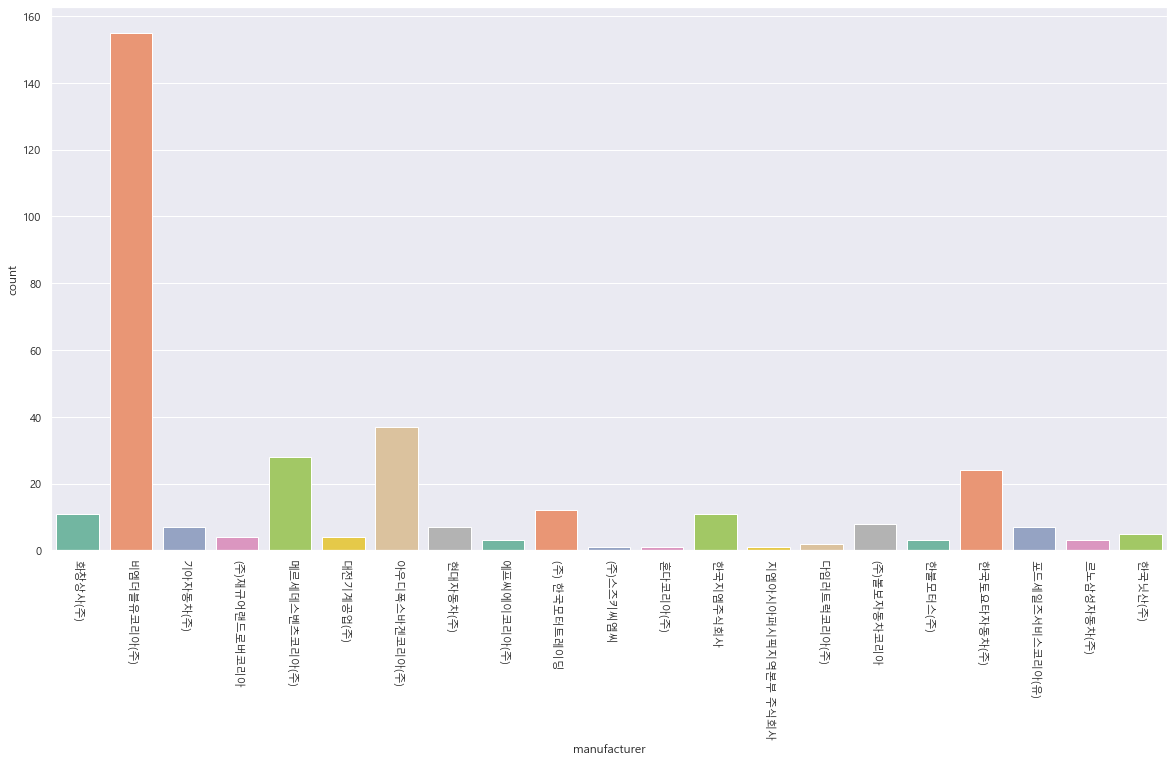

In [37]:
# 그래프를 출력합니다.
plt.figure(figsize=(20,10))
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="manufacturer", data=df[df['recall_month'].isin([10,11,12])], palette="Set2")
plt.xticks(rotation=270)
plt.show()

#### 3.6 하반기 생산연도별 리콜 현황 출력 ( 하반기 : 7-12월)

In [38]:
df[df['recall_month'] >= 7]

,manufacturer,model,cause,start_year,start_month,start_day,end_year,end_month,end-day,recall_year,recall_month,recall_day
124,화창상사(주),CHIEF CLASSIC,전기장치(기어 스위치) 접점의 산화로 인하여 저항 값이 변경되어 부정확한 기어단수(...,2013,11,7,2018,11,7,2019,12,31
125,화창상사(주),CHIEF DARK HORSE,전기장치(기어 스위치) 접점의 산화로 인하여 저항 값이 변경되어 부정확한 기어단수(...,2015,3,31,2019,3,31,2019,12,31
126,화창상사(주),CHEIF VINTAGE,전기장치(기어 스위치) 접점의 산화로 인하여 저항 값이 변경되어 부정확한 기어단수(...,2013,11,27,2019,11,27,2019,12,31
127,화창상사(주),CHIEFTAIN,전기장치(기어 스위치) 접점의 산화로 인하여 저항 값이 변경되어 부정확한 기어단수(...,2013,11,22,2019,11,22,2019,12,31
128,화창상사(주),CHIEFTAIN DARK HORSE,전기장치(기어 스위치) 접점의 산화로 인하여 저항 값이 변경되어 부정확한 기어단수(...,2016,8,17,2019,8,17,2019,12,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1270,한국닛산(주),INFINITI M30,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2012,2,6,2012,2,6,2020,12,28
1271,한국닛산(주),INFINITI M30d,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2012,7,18,2013,7,18,2020,12,28
1272,한국닛산(주),INFINITI Q70 3.0d,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2013,9,18,2015,9,18,2020,12,28
1273,한국닛산(주),INFINITI M56,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2010,5,25,2011,5,25,2020,12,28


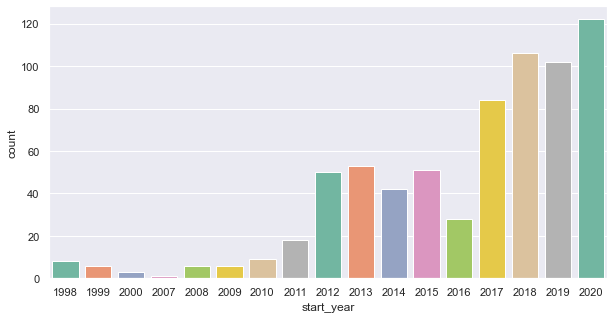

In [39]:
# 그래프를 출력합니다.
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
ax = sns.countplot(x="start_year", data=df[df['recall_month'] >= 7], palette="Set2")
plt.show()

#### 3.7 워드클라우드를 이용한 리콜 사유 시각화

In [47]:
# try:
#     from wordcloud import WordCloud, STOPWORDS
# except:
#     !pip install wordcloud
#     from wordcloud import WordCloud, STOPWORDS

In [46]:
from wordcloud import WordCloud, STOPWORDS

In [48]:
stopwords = set(["동안", "인하여", "있는", "경우", "있습니다", "가능성이", "않을", "차량의", "가", "에", "될", "이",
               "인해", "수", "중", "시", "또는", "있음", "의", "및", "있으며", "발생할", "이로", "오류로", "해당"])

In [49]:
# 리콜 사유에 해당하는 열의 값을 중복 제거한 뒤 모두 이어 붙임

text = ''

for cause in df['cause'].drop_duplicates():
    text += cause
    
text

'스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑 & 고) 2) 결함 원인 : 오토 스타트 결함(스탑&고 작동 시 재시동 불가 현상)은 과도한 전압강하로 인해 발생되며 이는 충분한 전류량이 흐를 수 없는 불충분한 엔진 배선 및 주 양극 배선 사이즈로 인해 유발됨콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품 내부에 균열이 발생할 가능성이 있음.뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부의 스프링이 바르게 장착 되지 않았을 가능성이 있음. *시트벨트 리트랙터 잠금장치: 급정지나 충격이 있을 경우 또는 시트벨트가 빠르게 당겨질 경우에 시트벨트가 풀어지지 않게 잠그는 장치비금속 재료(황화망간 또는 기타 산화물)가 특정부분에 비정상적으로 집중되어 일정한 운행조건에서 크랭크축이 파손될 수 있는 가능성이 확인되었습니다.사이드 스탠드 제조 공정상 용접 불량으로 사이드 스탠드의 용접 부위가 부러질 수 있음. (#참고 사항 : 2019년식 이후 모델에 장착된 사이드 스탠드는 공급사가 바뀌면서 이와 같은 문제 없음)2019년 01월 30일부터 2019년 10월 21일까지 생산된 BMW M5, M8 Competition 모델 중 171대 차량의 변속기 배선 고정 공정 과정에서 배선을 고정하는 클립을 잘 못 장착하여 고정된 위치가 과도한 압착 및 변속기 등 주변에서 발생하는 열에 영향을 받아 배선이 단락 될 수 있습니다.2017년식 Explorer 차량의 전동시트(파워시트) 프레임 트랙의 가장자리에 날카로운 마무리가 남아있을 수 있습니다. 이렇게, 시트 프레임 트랙의 날카로운 마무리로 인하여, 앞좌석과 콘솔 사이에 손을 넣으면 다칠 수 있는 위험이 있기 때문에 이를 예방하기 위해 제작결함을 시정하고자 함2015-2018년식 Mondeo 차량은 시간이 지남에 따라 배터리 음극(-)단자 주변에 황산구리가 생성될 수 있으며, 생성된 황산구리로 인하여 배터리 모니터링 센서 하단부

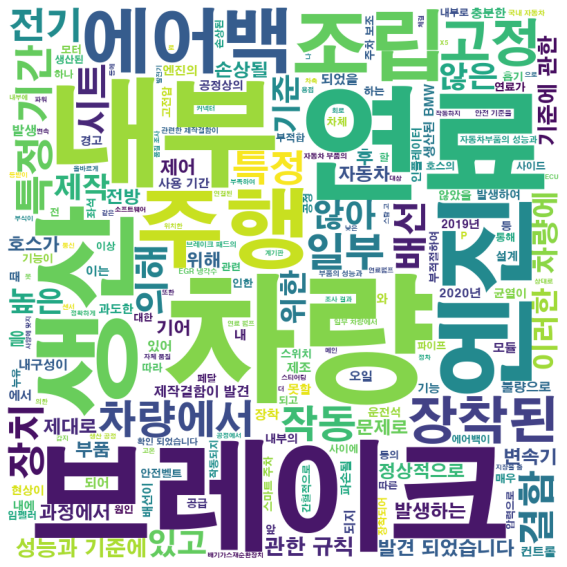

In [50]:
# 한글을 사용하기 위해서는 폰트 지정

wc1 = WordCloud(max_font_size=200, stopwords=stopwords, font_path='C:\\Windows\\Fonts\\H2GTRE.TTF',
                background_color='white', width=800, height=800)
wc1.generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wc1)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

#### 퀴즈 2. 기아자동차(주)의 제품 중 가장 최근에 리콜이 개시된 제품의 모델명을 구하세요.

In [51]:
df.head(2)

,manufacturer,model,cause,start_year,start_month,start_day,end_year,end_month,end-day,recall_year,recall_month,recall_day
0,(주)에프엠케이,기블리 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,28,2016,5,28,2020,3,23
1,(주)에프엠케이,콰트로포르테 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,8,2016,5,8,2020,3,23


In [52]:
df[df['manufacturer'] == '기아자동차(주)'].sort_values(by=['recall_year', 'recall_month', 'recall_day'], ascending=False).iloc[0]['model']

'쏘울(SK3) EV'